In [1]:
import torch_geometric
import torch
import gc
import matplotlib.pyplot as plt
import scipy
import glob
import random
from random import Random
import pandas as pd
from unicodedata import decimal
from torch_geometric.loader import DataLoader
from torch_geometric.data import Data
import math
import random
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from torch_geometric.data import InMemoryDataset
import torch_geometric.transforms as T

torch.cuda.empty_cache()

In [2]:
dataset_path = '/treesim/simset_Feb16_23_grove11/individual_trees/Grove10x10x10_skel_npy/'
# dataset_path = '/home/davidsos/Q/NS-TIP/Blender/parameter_grid_search_simulation_6_sept_2022/helios_output/' # '/home/scion.local/davidsos/Documents/Grove9000_blends_TLS'
unique_params = os.listdir(dataset_path)
print(unique_params[0:8])

['gridsearchGrove11_grow_length_0-44_grow_nodes_4_add_chance_0-8_add_side_branches_3_flush_90_Conifer-Tancred-012_vert.npy', 'gridsearchGrove11_grow_length_0-36_grow_nodes_3_add_chance_0-8_add_side_branches_5_flush_50_Conifer-Tancred-012_radius.npy', 'gridsearchGrove11_grow_length_0-44_grow_nodes_2_add_chance_0-9_add_side_branches_5_flush_70_Conifer-Tancred-012_vert.npy', 'gridsearchGrove11_grow_length_0-44_grow_nodes_4_add_chance_1_add_side_branches_5_flush_30_Conifer-Tancred-012_vert.npy', 'gridsearchGrove11_grow_length_0-28_grow_nodes_4_add_chance_0-8_add_side_branches_6_flush_30_Conifer-Tancred-012_edges.npy', 'gridsearchGrove11_grow_length_0-36_grow_nodes_2_add_chance_0-8_add_side_branches_4_flush_40_Conifer-Tancred-012_radius.npy', 'gridsearchGrove11_grow_length_0-2_grow_nodes_4_add_chance_0-9_add_side_branches_4_flush_60_Conifer-Tancred-012_edges.npy', 'gridsearchGrove11_grow_length_0-44_grow_nodes_3_add_chance_0-8_add_side_branches_6_flush_90_Conifer-Tancred-012_edges.npy']


In [3]:
data_list = []
# n_points = 100
# INTENSITY = 400000
N = len(os.listdir(dataset_path))
unique_params = os.listdir(dataset_path)
# unique_params = random.sample(unique_params, N)

print(unique_params[0:4], len(unique_params))

['gridsearchGrove11_grow_length_0-44_grow_nodes_4_add_chance_0-8_add_side_branches_3_flush_90_Conifer-Tancred-012_vert.npy', 'gridsearchGrove11_grow_length_0-36_grow_nodes_3_add_chance_0-8_add_side_branches_5_flush_50_Conifer-Tancred-012_radius.npy', 'gridsearchGrove11_grow_length_0-44_grow_nodes_2_add_chance_0-9_add_side_branches_5_flush_70_Conifer-Tancred-012_vert.npy', 'gridsearchGrove11_grow_length_0-44_grow_nodes_4_add_chance_1_add_side_branches_5_flush_30_Conifer-Tancred-012_vert.npy'] 3519


In [4]:
data_list = []

for i in range(0, len(unique_params)):
    print("index", i)
#     print(unique_params[i])
#     data = []
    if "edges" in unique_params[i]:
        print(unique_params[i])
        edge_arr = np.load(os.path.join(dataset_path + unique_params[i]))
        edge_arr = torch.from_numpy(edge_arr.T).to(torch.int).type(torch.LongTensor) # HAVE TO TRANSPOSE for [2, num_edges]
        rad_arr = np.load(os.path.join(dataset_path + unique_params[i].replace("edges", "radius")))
        rad_arr = torch.from_numpy(rad_arr).to(torch.float) # I didnt preserve decimals.. ?
        print(unique_params[i].replace("edges", "vert"))
        vert_arr = np.load(os.path.join(dataset_path + unique_params[i].replace("edges", "vert")))
        vert_arr = torch.from_numpy(vert_arr).to(torch.float)
        height = vert_arr[:,2].max()
#         print(vert_arr)
        split_name = unique_params[i].split(" ")[0].split("_")
        grow_len = split_name[3].replace("-", ".")
        grow_len = torch.from_numpy(np.array(float(grow_len))).to(torch.float)
        grow_nodes = split_name[6]
        grow_nodes = torch.from_numpy(np.array(float(grow_nodes))).to(torch.float)
        chance = split_name[9].replace("-", ".")
        chance = torch.from_numpy(np.array(float(chance))).to(torch.float)
        branches = split_name[13]
        branches = torch.from_numpy(np.array(float(branches))).to(torch.float)
        flush = split_name[15]
        flush = torch.from_numpy(np.array(float(flush))).to(torch.float)
        tree_id = int(split_name[-2].split("-")[2])
        data = Data(pos = vert_arr, edge_index = edge_arr, grow_len = grow_len, grow_nodes = grow_nodes, chance = chance,
                   branches = branches, flush = flush, height=height) # , radius=rad_arr)
#         data.ID = tree_id
        data_list.append(data)
    else:
        print("skip vert or radius")
        
# edge_arr.shape, vert_arr.shape

index 0
skip vert or radius
index 1
skip vert or radius
index 2
skip vert or radius
index 3
skip vert or radius
index 4
gridsearchGrove11_grow_length_0-28_grow_nodes_4_add_chance_0-8_add_side_branches_6_flush_30_Conifer-Tancred-012_edges.npy
gridsearchGrove11_grow_length_0-28_grow_nodes_4_add_chance_0-8_add_side_branches_6_flush_30_Conifer-Tancred-012_vert.npy
index 5
skip vert or radius
index 6
gridsearchGrove11_grow_length_0-2_grow_nodes_4_add_chance_0-9_add_side_branches_4_flush_60_Conifer-Tancred-012_edges.npy
gridsearchGrove11_grow_length_0-2_grow_nodes_4_add_chance_0-9_add_side_branches_4_flush_60_Conifer-Tancred-012_vert.npy
index 7
gridsearchGrove11_grow_length_0-44_grow_nodes_3_add_chance_0-8_add_side_branches_6_flush_90_Conifer-Tancred-012_edges.npy
gridsearchGrove11_grow_length_0-44_grow_nodes_3_add_chance_0-8_add_side_branches_6_flush_90_Conifer-Tancred-012_vert.npy
index 8
gridsearchGrove11_grow_length_0-2_grow_nodes_4_add_chance_1_add_side_branches_4_flush_40_Conifer-Tanc

In [5]:
# data_list[0].radius[0] # .item()
data_list[0] # .pos[0]

Data(edge_index=[2, 22041], pos=[26703, 3], grow_len=0.2800000011920929, grow_nodes=4.0, chance=0.800000011920929, branches=6.0, flush=30.0, height=7.4298272132873535)

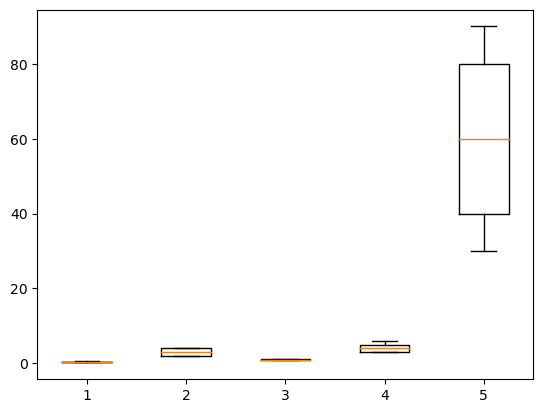

In [6]:
grow_len = [data_list[i].grow_len.item() for i in range(0, len (data_list))] #
grow_nodes = [data_list[i].grow_nodes.item() for i in range(0, len (data_list))] #
chance = [data_list[i].chance.item() for i in range(0, len (data_list))] #
branches = [data_list[i].branches.item() for i in range(0, len (data_list))] #
flush = [data_list[i].flush.item() for i in range(0, len (data_list))] #

# y_orig_val = [data_val[i].angle.item() for i in range(0, len (data_val))]
# y_orig_test = [data_test[i].angle.item() for i in range(0, len (data_test))]

plt.boxplot([grow_len, grow_nodes, chance, branches, flush])
plt.show()

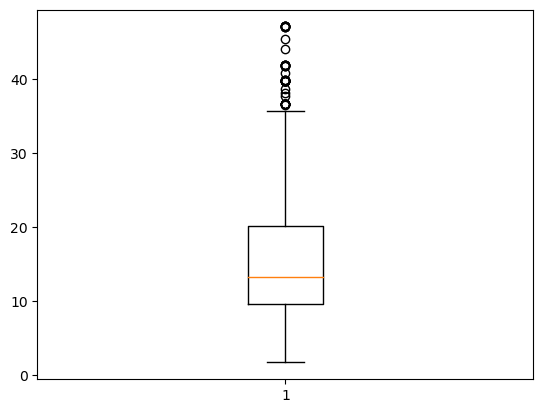

In [7]:
HITE = [data_list[i].height for i in range(0, len (data_list))] #

plt.boxplot([HITE])
plt.show()

In [8]:
random.seed(1991)
data_list2 = data_list.copy()
random.shuffle(data_list2)
data_train = data_list2[:round(len(data_list2)*0.8)]
data_val = data_list2[round(len(data_list2)*0.8):round(len(data_list2)*0.9)] # 100
data_test = data_list2[round(len(data_list2)*0.9):] # 100
data_test[0:10]

[Data(edge_index=[2, 36802], pos=[45164, 3], grow_len=0.5199999809265137, grow_nodes=3.0, chance=1.0, branches=3.0, flush=30.0, height=15.773228645324707),
 Data(edge_index=[2, 31499], pos=[38395, 3], grow_len=0.36000001430511475, grow_nodes=4.0, chance=1.0, branches=5.0, flush=30.0, height=10.889847755432129),
 Data(edge_index=[2, 56120], pos=[66954, 3], grow_len=0.2800000011920929, grow_nodes=2.0, chance=1.0, branches=3.0, flush=80.0, height=22.539936065673828),
 Data(edge_index=[2, 156914], pos=[190468, 3], grow_len=0.36000001430511475, grow_nodes=3.0, chance=0.800000011920929, branches=3.0, flush=80.0, height=24.52273941040039),
 Data(edge_index=[2, 80554], pos=[97003, 3], grow_len=0.4399999976158142, grow_nodes=4.0, chance=0.800000011920929, branches=3.0, flush=90.0, height=24.39082145690918),
 Data(edge_index=[2, 94352], pos=[115169, 3], grow_len=0.20000000298023224, grow_nodes=4.0, chance=0.8999999761581421, branches=4.0, flush=90.0, height=13.341574668884277),
 Data(edge_index=

In [9]:
print(len(data_train), len(data_val), len(data_test))

938 118 117


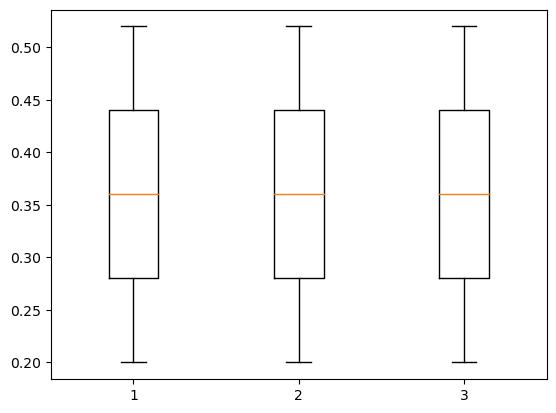

In [10]:
y_orig = [data_train[i].grow_len.item() for i in range(0, len (data_train))] # new_train
y_orig_val = [data_val[i].grow_len.item() for i in range(0, len (data_val))]
y_orig_test = [data_test[i].grow_len.item() for i in range(0, len (data_test))]
plt.boxplot([y_orig, y_orig_val, y_orig_test])
plt.show()

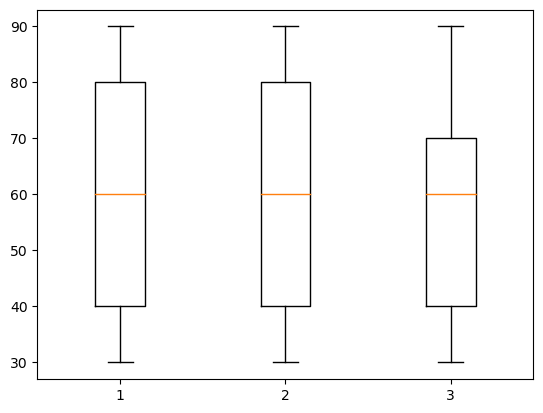

In [9]:
# Visualize distributions

y_orig = [data_train[i].flush.item() for i in range(0, len (data_train))] # new_train
y_orig_val = [data_val[i].flush.item() for i in range(0, len (data_val))]
y_orig_test = [data_test[i].flush.item() for i in range(0, len (data_test))]
plt.boxplot([y_orig, y_orig_val, y_orig_test])
plt.show()

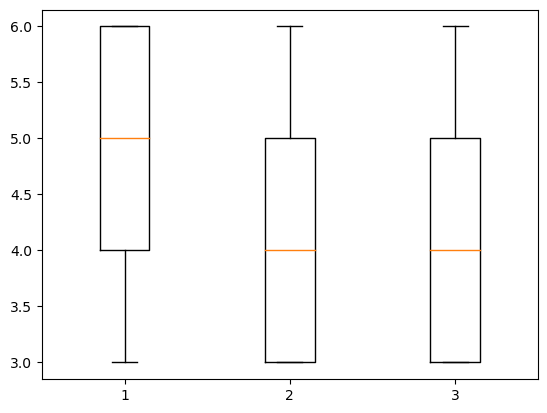

In [10]:
y_orig = [data_train[i].branches.item() for i in range(0, len (data_train))] # new_train
y_orig_val = [data_val[i].branches.item() for i in range(0, len (data_val))]
y_orig_test = [data_test[i].branches.item() for i in range(0, len (data_test))]
plt.boxplot([y_orig, y_orig_val, y_orig_test])
plt.show()

In [11]:
from sklearn.preprocessing import MinMaxScaler

y_orig = [data_train[i].grow_len.item() for i in range(0, len (data_train))] # new_train
y_orig_val = [data_val[i].grow_len.item() for i in range(0, len (data_val))]
y_orig_test = [data_test[i].grow_len.item() for i in range(0, len (data_test))]

scalerGL = MinMaxScaler((0,100))
scalerGL = scalerGL.fit(np.array(y_orig).reshape(-1, 1))
y_orig_new = scalerGL.transform(np.array(y_orig).reshape(-1, 1))
y_val_new = scalerGL.transform(np.array(y_orig_val).reshape(-1, 1))
y_test_new = scalerGL.transform(np.array(y_orig_test).reshape(-1, 1))

for i in range(0, len (data_train)):
    print(i, data_train[i].grow_len)
    print("new val", y_orig_new[i])
    print(torch.from_numpy(np.array(np.round(y_orig_new[i][0], 2))).to(torch.float))
    val = torch.from_numpy(np.array(np.round(y_orig_new[i][0], 2))).to(torch.float) # new_train
    data_train[i].grow_len2 = val
    print(i, data_train[i].grow_len2)

for i in range(0, len (data_val)):
    print(i, data_train[i].grow_len)
    print("new val", y_val_new[i])
    print(torch.from_numpy(np.array(np.round(y_val_new[i][0], 2))).to(torch.float))
    val = torch.from_numpy(np.array(np.round(y_val_new[i][0], 2))).to(torch.float) # new_train
    data_val[i].grow_len2 = val
    print(i, data_val[i].grow_len2)

    
for i in range(0, len (data_test)):
    print(i, data_test[i].grow_len)
    print("new val", y_test_new[i])
    print(torch.from_numpy(np.array(np.round(y_test_new[i][0], 2))).to(torch.float))
    val = torch.from_numpy(np.array(np.round(y_test_new[i][0], 2))).to(torch.float) # new_train
    data_test[i].grow_len2 = val
    print(i, data_test[i].grow_len2)


0 tensor(0.5200)
new val [100.]
tensor(100.)
0 tensor(100.)
1 tensor(0.2000)
new val [0.]
tensor(0.)
1 tensor(0.)
2 tensor(0.4400)
new val [75.00000349]
tensor(75.)
2 tensor(75.)
3 tensor(0.2800)
new val [25.00000116]
tensor(25.)
3 tensor(25.)
4 tensor(0.4400)
new val [75.00000349]
tensor(75.)
4 tensor(75.)
5 tensor(0.5200)
new val [100.]
tensor(100.)
5 tensor(100.)
6 tensor(0.5200)
new val [100.]
tensor(100.)
6 tensor(100.)
7 tensor(0.2000)
new val [0.]
tensor(0.)
7 tensor(0.)
8 tensor(0.2000)
new val [0.]
tensor(0.)
8 tensor(0.)
9 tensor(0.2800)
new val [25.00000116]
tensor(25.)
9 tensor(25.)
10 tensor(0.2000)
new val [0.]
tensor(0.)
10 tensor(0.)
11 tensor(0.2800)
new val [25.00000116]
tensor(25.)
11 tensor(25.)
12 tensor(0.3600)
new val [50.00000698]
tensor(50.)
12 tensor(50.)
13 tensor(0.2000)
new val [0.]
tensor(0.)
13 tensor(0.)
14 tensor(0.5200)
new val [100.]
tensor(100.)
14 tensor(100.)
15 tensor(0.4400)
new val [75.00000349]
tensor(75.)
15 tensor(75.)
16 tensor(0.2000)
new v

In [12]:
y_orig_new

array([[100.        ],
       [  0.        ],
       [ 75.00000349],
       [ 25.00000116],
       [ 75.00000349],
       [100.        ],
       [100.        ],
       [  0.        ],
       [  0.        ],
       [ 25.00000116],
       [  0.        ],
       [ 25.00000116],
       [ 50.00000698],
       [  0.        ],
       [100.        ],
       [ 75.00000349],
       [  0.        ],
       [100.        ],
       [ 25.00000116],
       [ 75.00000349],
       [ 25.00000116],
       [ 75.00000349],
       [ 75.00000349],
       [  0.        ],
       [100.        ],
       [100.        ],
       [ 25.00000116],
       [ 25.00000116],
       [ 50.00000698],
       [ 50.00000698],
       [100.        ],
       [ 25.00000116],
       [ 50.00000698],
       [ 25.00000116],
       [ 75.00000349],
       [100.        ],
       [  0.        ],
       [ 75.00000349],
       [ 25.00000116],
       [ 25.00000116],
       [ 50.00000698],
       [ 25.00000116],
       [ 75.00000349],
       [ 25

In [83]:
y_test_new

array([[100.        ],
       [ 50.00000698],
       [ 25.00000116],
       [ 50.00000698],
       [ 75.00000349],
       [  0.        ],
       [ 25.00000116],
       [ 75.00000349],
       [ 50.00000698],
       [ 25.00000116],
       [ 75.00000349],
       [  0.        ],
       [ 25.00000116],
       [ 75.00000349],
       [ 25.00000116],
       [ 75.00000349],
       [100.        ],
       [ 50.00000698],
       [ 75.00000349],
       [ 50.00000698],
       [ 75.00000349],
       [ 75.00000349],
       [  0.        ],
       [  0.        ],
       [100.        ],
       [ 50.00000698],
       [ 50.00000698],
       [ 25.00000116],
       [ 75.00000349],
       [ 25.00000116],
       [  0.        ],
       [ 75.00000349],
       [ 50.00000698],
       [  0.        ],
       [  0.        ],
       [ 75.00000349],
       [100.        ],
       [ 75.00000349],
       [ 50.00000698],
       [ 50.00000698],
       [ 50.00000698],
       [ 25.00000116],
       [ 25.00000116],
       [ 50

In [13]:
from sklearn.preprocessing import MinMaxScaler

y_orig = [data_train[i].flush.item() for i in range(0, len (data_train))] # new_train
y_orig_val = [data_val[i].flush.item() for i in range(0, len (data_val))]
y_orig_test = [data_test[i].flush.item() for i in range(0, len (data_test))]

scalerFL = MinMaxScaler((0,100))
scalerFL = scalerFL.fit(np.array(y_orig).reshape(-1, 1))
y_orig_new = scalerFL.transform(np.array(y_orig).reshape(-1, 1))
y_val_new = scalerFL.transform(np.array(y_orig_val).reshape(-1, 1))
y_test_new = scalerFL.transform(np.array(y_orig_test).reshape(-1, 1))

for i in range(0, len (data_train)):
    print("new val", y_orig_new[i])
    print(torch.from_numpy(np.array(np.round(y_orig_new[i][0], 2))).to(torch.float))
    val = torch.from_numpy(np.array(np.round(y_orig_new[i][0], 2))).to(torch.float)
    data_train[i].flush2 = val
    print(i, data_train[i].flush2)

for i in range(0, len (data_val)):
    print("new val", y_val_new[i])
    print(torch.from_numpy(np.array(np.round(y_val_new[i][0], 2))).to(torch.float))
    val = torch.from_numpy(np.array(np.round(y_val_new[i][0], 2))).to(torch.float)
    data_val[i].flush2 = val
    print(i, data_val[i].flush2)

for i in range(0, len (data_test)):
    print("new val", y_test_new[i])
    print(torch.from_numpy(np.array(np.round(y_test_new[i][0], 2))).to(torch.float))
    val = torch.from_numpy(np.array(np.round(y_test_new[i][0], 2))).to(torch.float)
    data_test[i].flush2 = val
    print(i, data_test[i].flush2)


new val [50.]
tensor(50.)
0 tensor(50.)
new val [33.33333333]
tensor(33.3300)
1 tensor(33.3300)
new val [66.66666667]
tensor(66.6700)
2 tensor(66.6700)
new val [0.]
tensor(0.)
3 tensor(0.)
new val [66.66666667]
tensor(66.6700)
4 tensor(66.6700)
new val [0.]
tensor(0.)
5 tensor(0.)
new val [66.66666667]
tensor(66.6700)
6 tensor(66.6700)
new val [50.]
tensor(50.)
7 tensor(50.)
new val [33.33333333]
tensor(33.3300)
8 tensor(33.3300)
new val [66.66666667]
tensor(66.6700)
9 tensor(66.6700)
new val [50.]
tensor(50.)
10 tensor(50.)
new val [83.33333333]
tensor(83.3300)
11 tensor(83.3300)
new val [0.]
tensor(0.)
12 tensor(0.)
new val [50.]
tensor(50.)
13 tensor(50.)
new val [66.66666667]
tensor(66.6700)
14 tensor(66.6700)
new val [50.]
tensor(50.)
15 tensor(50.)
new val [0.]
tensor(0.)
16 tensor(0.)
new val [33.33333333]
tensor(33.3300)
17 tensor(33.3300)
new val [16.66666667]
tensor(16.6700)
18 tensor(16.6700)
new val [0.]
tensor(0.)
19 tensor(0.)
new val [50.]
tensor(50.)
20 tensor(50.)
new 

In [14]:
from sklearn.preprocessing import MinMaxScaler

y_orig = [data_train[i].branches.item() for i in range(0, len (data_train))] # new_train
y_orig_val = [data_val[i].branches.item() for i in range(0, len (data_val))]
y_orig_test = [data_test[i].branches.item() for i in range(0, len (data_test))]

scalerBR = MinMaxScaler((0,100))
scalerBR = scalerBR.fit(np.array(y_orig).reshape(-1, 1))
y_orig_new = scalerBR.transform(np.array(y_orig).reshape(-1, 1))
y_val_new = scalerBR.transform(np.array(y_orig_val).reshape(-1, 1))
y_test_new = scalerBR.transform(np.array(y_orig_test).reshape(-1, 1))

for i in range(0, len (data_train)):
    print("new val", y_orig_new[i])
    print(torch.from_numpy(np.array(np.round(y_orig_new[i][0], 2))).to(torch.float))
    val = torch.from_numpy(np.array(np.round(y_orig_new[i][0], 2))).to(torch.float)
    data_train[i].branches2 = val
    print(i, data_train[i].branches2)

for i in range(0, len (data_val)):
    print("new val", y_val_new[i])
    print(torch.from_numpy(np.array(np.round(y_val_new[i][0], 2))).to(torch.float))
    val = torch.from_numpy(np.array(np.round(y_val_new[i][0], 2))).to(torch.float)
    data_val[i].branches2 = val
    print(i, data_val[i].branches2)

    
for i in range(0, len (data_test)):
    print("new val", y_test_new[i])
    print(torch.from_numpy(np.array(np.round(y_test_new[i][0], 2))).to(torch.float))
    val = torch.from_numpy(np.array(np.round(y_test_new[i][0], 2))).to(torch.float)
    data_test[i].branches2 = val
    print(i, data_test[i].branches2)


new val [66.66666667]
tensor(66.6700)
0 tensor(66.6700)
new val [100.]
tensor(100.)
1 tensor(100.)
new val [100.]
tensor(100.)
2 tensor(100.)
new val [66.66666667]
tensor(66.6700)
3 tensor(66.6700)
new val [66.66666667]
tensor(66.6700)
4 tensor(66.6700)
new val [33.33333333]
tensor(33.3300)
5 tensor(33.3300)
new val [100.]
tensor(100.)
6 tensor(100.)
new val [100.]
tensor(100.)
7 tensor(100.)
new val [100.]
tensor(100.)
8 tensor(100.)
new val [100.]
tensor(100.)
9 tensor(100.)
new val [66.66666667]
tensor(66.6700)
10 tensor(66.6700)
new val [66.66666667]
tensor(66.6700)
11 tensor(66.6700)
new val [33.33333333]
tensor(33.3300)
12 tensor(33.3300)
new val [33.33333333]
tensor(33.3300)
13 tensor(33.3300)
new val [33.33333333]
tensor(33.3300)
14 tensor(33.3300)
new val [66.66666667]
tensor(66.6700)
15 tensor(66.6700)
new val [66.66666667]
tensor(66.6700)
16 tensor(66.6700)
new val [0.]
tensor(0.)
17 tensor(0.)
new val [0.]
tensor(0.)
18 tensor(0.)
new val [0.]
tensor(0.)
19 tensor(0.)
new v

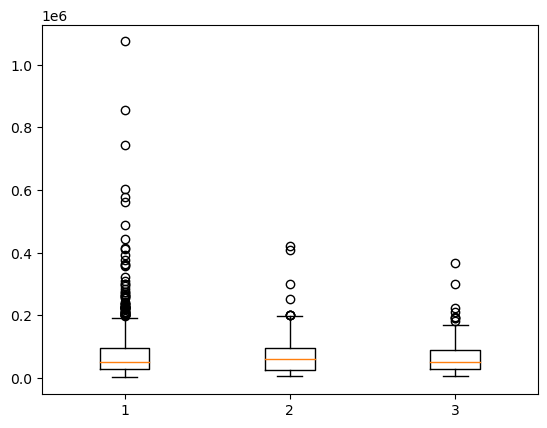

In [15]:
## Vertices distribution
y_orig = [data_train[i].pos.shape[0] for i in range(0, len (data_train))] # new_train
y_orig_val = [data_val[i].pos.shape[0] for i in range(0, len (data_val))]
y_orig_test = [data_test[i].pos.shape[0] for i in range(0, len (data_test))]
plt.boxplot([y_orig, y_orig_val, y_orig_test])
plt.show()

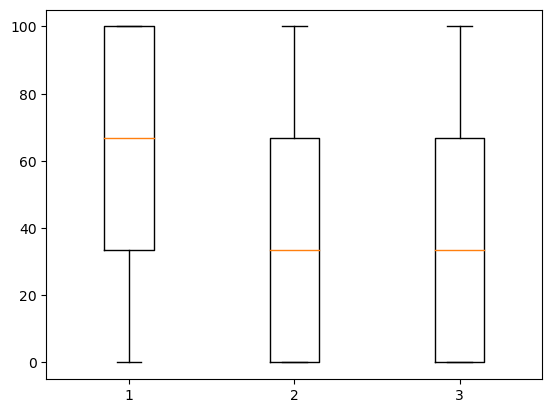

In [16]:
# dont run!! otherwise it affet guessing RMSE value
y_orig = [data_train[i].branches2.item() for i in range(0, len (data_train))] # new_train
y_orig_val = [data_val[i].branches2.item() for i in range(0, len (data_val))]
y_orig_test = [data_test[i].branches2.item() for i in range(0, len (data_test))]
plt.boxplot([y_orig, y_orig_val, y_orig_test])
plt.show()

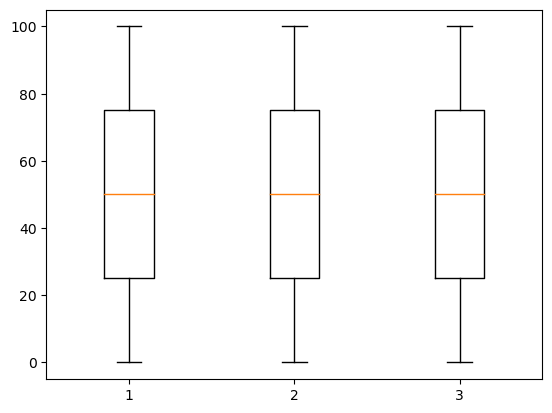

In [17]:
# dont run!! otherwise it affet guessing RMSE value
y_orig = [data_train[i].grow_len2.item() for i in range(0, len (data_train))] # new_train
y_orig_val = [data_val[i].grow_len2.item() for i in range(0, len (data_val))]
y_orig_test = [data_test[i].grow_len2.item() for i in range(0, len (data_test))]
plt.boxplot([y_orig, y_orig_val, y_orig_test])
plt.show()

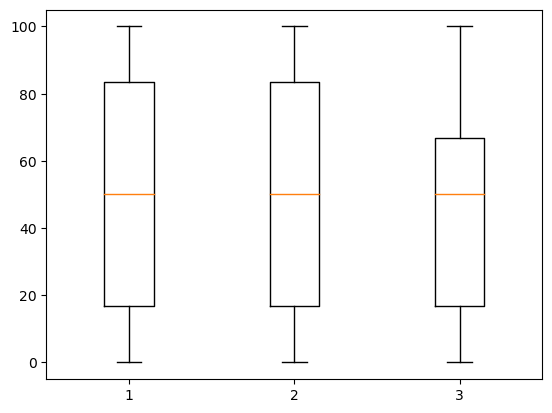

In [18]:
# dont run!! otherwise it affet guessing RMSE value
y_orig = [data_train[i].flush2.item() for i in range(0, len (data_train))] # new_train
y_orig_val = [data_val[i].flush2.item() for i in range(0, len (data_val))]
y_orig_test = [data_test[i].flush2.item() for i in range(0, len (data_test))]
plt.boxplot([y_orig, y_orig_val, y_orig_test])
plt.show()

In [2]:
# plt.scatter(weight, n_pos) # n_edges
# plt.show()

In [3]:
# slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(weight, n_pos)
# print("R2", r_value)

In [4]:
# plt.scatter(weight, n_pos_orig) # n_edges
# plt.show()

In [19]:
data_test[0:5]

[Data(edge_index=[2, 36802], pos=[45164, 3], grow_len=0.5199999809265137, grow_nodes=3.0, chance=1.0, branches=3.0, flush=30.0, height=15.773228645324707, grow_len2=100.0, flush2=0.0, branches2=0.0),
 Data(edge_index=[2, 31499], pos=[38395, 3], grow_len=0.36000001430511475, grow_nodes=4.0, chance=1.0, branches=5.0, flush=30.0, height=10.889847755432129, grow_len2=50.0, flush2=0.0, branches2=66.66999816894531),
 Data(edge_index=[2, 56120], pos=[66954, 3], grow_len=0.2800000011920929, grow_nodes=2.0, chance=1.0, branches=3.0, flush=80.0, height=22.539936065673828, grow_len2=25.0, flush2=83.33000183105469, branches2=0.0),
 Data(edge_index=[2, 156914], pos=[190468, 3], grow_len=0.36000001430511475, grow_nodes=3.0, chance=0.800000011920929, branches=3.0, flush=80.0, height=24.52273941040039, grow_len2=50.0, flush2=83.33000183105469, branches2=0.0),
 Data(edge_index=[2, 80554], pos=[97003, 3], grow_len=0.4399999976158142, grow_nodes=4.0, chance=0.800000011920929, branches=3.0, flush=90.0, he

In [20]:
print(len(data_train),len(data_val), len(data_test))

938 118 117


In [21]:
data_train[0]

Data(edge_index=[2, 29159], pos=[35424, 3], grow_len=0.5199999809265137, grow_nodes=2.0, chance=0.800000011920929, branches=5.0, flush=60.0, height=15.518725395202637, grow_len2=100.0, flush2=50.0, branches2=66.66999816894531)

In [22]:
class DBHDataSet_train_aug(InMemoryDataset):
    def __init__(self, root, transform=None, pre_transform=None, pre_filter=None):
        super().__init__(root, transform, pre_transform, pre_filter)
        self.data, self.slices = torch.load(self.processed_paths[0])

    @property
    def processed_file_names(self):
        return ['data.pt']

    def process(self):
        data_list = data_train

        if self.pre_filter is not None:
            data_list = [data for data in data_list if self.pre_filter(data)]

        if self.pre_transform is not None:
            data_list = [self.pre_transform(data) for data in data_list]

        data, slices = self.collate(data_list)
        torch.save((data, slices), self.processed_paths[0])

fly_transform = T.Compose([
    T.RandomRotate(degrees = [-180, 180], axis = 2),
#                         T.RandomRotate(degrees = [-10, 10], axis = 0),
#                         T.RandomRotate(degrees = [-10, 10], axis = 1)
])

DBH_DS = DBHDataSet_train_aug(root = "/treesim/Deep_Learning/PyTorch_Geometric/PyG_Datasets/train_ID12_Inverse_0", transform = fly_transform) # 
#                               , 
#                               transform = fly_transform) # , pre_transform=transform) # , , transform = fly_transform

Processing...
Done!


In [70]:
torch_geometric.__version__

'2.2.0'

In [71]:
DBH_DS[33].pos[:,2].min()

tensor(-0.1698)

In [1]:
# param = []
# n_pos = []
# max_x = []
# max_y = []
# max_z = []

# for i in range(0, len(DBH_DS)):
#     param.append(DBH_DS[i].param.item())
#     max_z.append(float(max(DBH_DS[i].pos[:,2])))
#     max_y.append(float(max(DBH_DS[i].pos[:,1])))
#     max_x.append(float(max(DBH_DS[i].pos[:,0])))
#     n_pos.append(DBH_DS[i].pos.shape[0])

In [ ]:
plt.scatter(param, max_x) # x, y
plt.show()

In [ ]:
plt.scatter(param, max_y) # x, y
plt.show()

In [ ]:
plt.scatter(param, max_z) # x, y
plt.show()

In [23]:
class DBHDataSet_val(InMemoryDataset):
    def __init__(self, root, transform=None, pre_transform=None, pre_filter=None):
        super().__init__(root, transform, pre_transform, pre_filter)
        self.data, self.slices = torch.load(self.processed_paths[0])

    @property
    def processed_file_names(self):
        return ['data.pt']

    def process(self):
        data_list = data_val

        if self.pre_filter is not None:
            data_list = [data for data in data_list if self.pre_filter(data)]

        if self.pre_transform is not None:
            data_list = [self.pre_transform(data) for data in data_list]

        data, slices = self.collate(data_list)
        torch.save((data, slices), self.processed_paths[0])


DBH_DS_val = DBHDataSet_val(root="/treesim/Deep_Learning/PyTorch_Geometric/PyG_Datasets/val_ID12_Inverse_0") # , transform = fly_transform) 


Processing...
Done!


In [25]:
class DBHDataSet_test(InMemoryDataset):
    def __init__(self, root, transform=None, pre_transform=None, pre_filter=None):
        super().__init__(root, transform, pre_transform, pre_filter)
        self.data, self.slices = torch.load(self.processed_paths[0])

    @property
    def processed_file_names(self):
        return ['data.pt']

    def process(self):
        data_list = data_test

        if self.pre_filter is not None:
            data_list = [data for data in data_list if self.pre_filter(data)]

        if self.pre_transform is not None:
            data_list = [self.pre_transform(data) for data in data_list]

        data, slices = self.collate(data_list)
        torch.save((data, slices), self.processed_paths[0])
        
DBH_DS_test = DBHDataSet_test(root="/treesim/Deep_Learning/PyTorch_Geometric/PyG_Datasets/test_ID12_Inverse_0") # , transform = fly_transform) 

Processing...
Done!


In [24]:
weight = []
n_pos = []
max_x = []
max_y = []
max_z = []

for i in range(0, len(DBH_DS_test)):
    print(i)
    param.append(DBH_DS_test[i].weight.item())
    max_z.append(float(max(DBH_DS_test[i].pos[:,2])))
    max_y.append(float(max(DBH_DS_test[i].pos[:,1])))
    max_x.append(float(max(DBH_DS_test[i].pos[:,0])))
    n_pos.append(DBH_DS_test[i].pos.shape[0])

NameError: name 'DBH_DS_test' is not defined

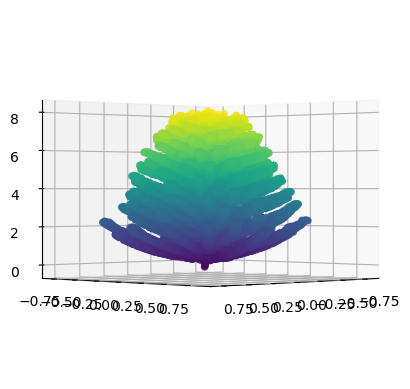

<Figure size 1400x1000 with 0 Axes>

In [13]:
ax = plt.axes(projection='3d')
fig = plt.figure(figsize = (14, 10))

# Data for a three-dimensional line
# zline = np.linspace(0, 15, 1000)
# xline = np.sin(zline)
# yline = np.cos(zline)
# ax.plot3D(xline, yline, zline, 'gray')

i = 11

# Data for three-dimensional scattered points
ax.scatter3D(DBH_DS_test[i].pos[:, 0], DBH_DS_test[i].pos[:, 1], DBH_DS_test[i].pos[:, 2], c=DBH_DS_test[i].pos[:, 2]) # , cmap='Greens');
ax.view_init(0, 45)
plt.show()

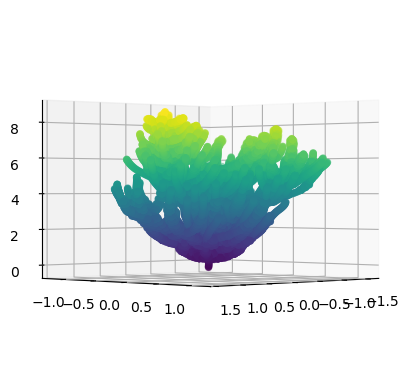

<Figure size 1400x1000 with 0 Axes>

In [20]:
ax = plt.axes(projection='3d')
fig = plt.figure(figsize = (14, 10))

# Data for a three-dimensional line
# zline = np.linspace(0, 15, 1000)
# xline = np.sin(zline)
# yline = np.cos(zline)
# ax.plot3D(xline, yline, zline, 'gray')

i = 45

# Data for three-dimensional scattered points
ax.scatter3D(DBH_DS_test[i].pos[:, 0], DBH_DS_test[i].pos[:, 1], DBH_DS_test[i].pos[:, 2], c=DBH_DS_test[i].pos[:, 2]) # , cmap='Greens');
ax.view_init(0, 45)
plt.show()

NameError: name 'data_test' is not defined

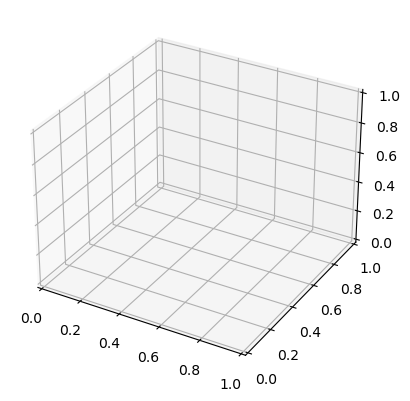

<Figure size 1400x1000 with 0 Axes>

In [14]:
ax = plt.axes(projection='3d')
fig = plt.figure(figsize = (14, 10))

# Data for a three-dimensional line
# zline = np.linspace(0, 15, 1000)
# xline = np.sin(zline)
# yline = np.cos(zline)
# ax.plot3D(xline, yline, zline, 'gray')

i = 3

# Data for three-dimensional scattered points
ax.scatter3D(data_test[i].pos[:, 0], data_test[i].pos[:, 1], data_test[i].pos[:, 2], c=data_test[i].pos[:, 2]) # , cmap='Greens');
ax.view_init(40,90)
plt.show()

In [ ]:
plt.scatter(weight, max_z) # x, y
plt.show()

In [ ]:
plt.scatter(weight, n_pos) # x, y
plt.show()

In [34]:
TRAIN_BS = 26
train_loader = DataLoader(DBH_DS, batch_size=TRAIN_BS, shuffle=True, num_workers=24) # BS must be equal to (or multiple?) of hidden_channels??
val_loader = DataLoader(DBH_DS_val, batch_size=TRAIN_BS, shuffle = False, num_workers=24)
test_loader = DataLoader(DBH_DS_test, batch_size=TRAIN_BS, shuffle = False, num_workers=25)
print("DATALOADERS READY")

DATALOADERS READY


In [35]:
## Test RMSE if Guessing Training mean

rms = 16
len(y_orig)
import statistics

statistics.mean(y_orig), statistics.mean(y_orig_test)

y_test_guess = []
# just keep appending the training data mean
for i in range(0, len(y_orig_test)):
    y_test_guess.append(statistics.mean(y_orig))

## Guessing RMSE (because squared = False)

# compare testing param values vs training data mean
rms = mean_squared_error(y_orig_test, y_test_guess, squared=False)
print(rms) # Ag Test Guess: 31.68 

# 26.4


59244.77278086136


In [36]:
# average number of points in test examples:
points = []
import statistics

for data in DBH_DS_test:
    points.append(len(data.pos[:,0]))

print(statistics.mean(points))

67678


In [37]:
""" GNN MULTITASK SKELETONS"""

import torch
import torch.nn.functional as F
from torch_cluster import knn_graph, knn
from torch_geometric.nn import global_max_pool, global_mean_pool, global_sort_pool #, TopKPooling
from torch_cluster import fps

from torch.nn import Sequential, Linear, ReLU #, Conv1d
from torch_geometric.nn import MessagePassing
from torch_geometric.transforms import BaseTransform
from torch_geometric.utils import remove_isolated_nodes, dropout_adj

# K = 16 # no KNN graph cause we already have the edge_index :)
LOOP = True
FILTERS = 32
# scaler = "None"
TOPK = 0.5
Dropout = True

class PointNetLayer(MessagePassing):
    def __init__(self, in_channels, out_channels):
        # Message passing with "max" aggregation.
        super().__init__(aggr='max') # max
        
        # Initialization of the MLP:
        # Here, the number of input features correspond to the hidden node
        # dimensionality plus point dimensionality (=3).
        self.mlp = Sequential(Linear(in_channels + 3, out_channels),
                              ReLU(),
                              Linear(out_channels, out_channels))
        
    def forward(self, h, pos, edge_index):
        # Start propagating messages.
        return self.propagate(edge_index, h=h, pos=pos)
    
    def message(self, h_j, pos_j, pos_i):
        # h_j defines the features of neighboring nodes as shape [num_edges, in_channels]
        # pos_j defines the position of neighboring nodes as shape [num_edges, 3]
        # pos_i defines the position of central nodes as shape [num_edges, 3]

        input = pos_j - pos_i  # Compute spatial relation.

        if h_j is not None:
            # In the first layer, we may not have any hidden node features,
            # so we only combine them in case they are present.
            input = torch.cat([h_j, input], dim=-1)

        return self.mlp(input)  # Apply our final MLP.
    

class PointNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(12345)
        torch.cuda.manual_seed_all(12345)
        self.conv1 = PointNetLayer(3, FILTERS) # 32 
        self.conv2 = PointNetLayer(FILTERS, FILTERS)# 32
        self.conv3 = PointNetLayer(FILTERS, FILTERS)# 32
#         self.dropout40 = torch.nn.Dropout(0.5)
#         self.dropout60 = torch.nn.Dropout(0.5)
        self.regressor1 = Linear(FILTERS, 1)  # 32, 1 # in_features, out_features
        self.regressor2 = Linear(FILTERS, 1)  # 32, 1 # in_features, out_features
        self.regressor3 = Linear(FILTERS, 1)  # 32, 1 # in_features, out_features
        
    def forward(self, pos, edge_index, batch): # pos
        # Compute the kNN graph:
        # Here, we need to pass the batch vector to the function call in order
        # to prevent creating edges between points of different examples.
        # We also add `loop=True` which will add self-loops to the graph in
        # order to preserve central point information.
        edge_index = remove_isolated_nodes(edge_index)[0]

        # 3. Start bipartite message passing.
        h = self.conv1(h=pos, pos=pos, edge_index=edge_index)
        h = h.relu()
        
        h = self.conv2(h=h, pos=pos, edge_index=edge_index)
        h = h.relu()

        h = self.conv2(h=h, pos=pos, edge_index=edge_index)
        h = h.relu()
        
        # 4. Global Pooling.
        h = global_mean_pool(h, batch)  # pools the features [num_examples, hidden_channels]
        
        # 5. Regressors.
        return [self.regressor1(h), self.regressor2(h), self.regressor3(h)]



In [94]:

gc.collect()
torch.cuda.empty_cache()
gc.collect()
torch.cuda.empty_cache()

In [39]:
# torch.cuda.empty_cache() 

def train(model, optimizer, loader):
    model.train()
    total_loss = 0
    count = 0
    for data_batch in loader:
        data = data_batch
        optimizer.zero_grad()  # Clear gradients.
        logits = model(data.pos.to(device), data.edge_index.to(device), data.batch.to(device))  # Forward pass. #data.pos
        loss1 = loss_angle(logits[0].to(torch.float32).squeeze(-1).to(device), data.grow_len2.to(torch.float32).to(device)) # Loss computation. # logits[1]
        loss2 = loss_weight(logits[1].to(torch.float32).squeeze(-1).to(device), data.branches2.to(torch.float32).to(device)) # Loss computation. # logits[1]
        loss3 = loss_tu(logits[2].to(torch.float32).squeeze(-1).to(device), data.flush2.to(torch.float32).to(device)) # Loss computation. # logits[1]

        loss = loss1 + loss2 + loss3
        loss.backward()  # Backward pass.
        optimizer.step()  # Update model parameters.
        
#         print(loss.item())
#         print("loss item", loss.item())
        total_loss += loss.item() # * data.num_graphs (num_graphs is just batch size.. weird)
        count+=1

    return math.sqrt(total_loss / count) # len(train_loader.dataset)) math.sqrt(

@torch.no_grad()
def test_rmse(model, loader):
    model.eval()
    total_MSE = 0
    count = 0
    # 
    for data_batch in loader:
        data = data_batch
        preds = model(data.pos.to(device), data.edge_index.to(device), data.batch.to(device))
#         y_output_pred.squeeze(-1)
        loss1 = loss_angle(preds[0].to(torch.float32).squeeze(-1).to(device), data.grow_len2.to(torch.float32).to(device)) # Loss computation. # logits[1]
        loss2 = loss_weight(preds[1].to(torch.float32).squeeze(-1).to(device), data.branches2.to(torch.float32).to(device)) # Loss computation. # logits[1]
        loss3 = loss_tu(preds[2].to(torch.float32).squeeze(-1).to(device), data.flush2.to(torch.float32).to(device)) # Loss computation. # logits[1]
        loss = loss1 + loss2 + loss3
#         print("losses:", loss1, loss2, loss3)
#         print("loss item", loss.item())
        total_MSE += loss.item() #  * data.num_graphs
        count+=1
        
    return math.sqrt(total_MSE / count) ## math.sqrt(
# Epoch: 09, TR: 40.5951, VAL: 44.0514, TEST: 43.7503 REST:(18.959806190820018, 30.748798626017233, 25.222228839591452)

def class_rmse(model, loader):
    model.eval()
    MSE_1 = 0
    MSE_2 = 0
    MSE_3 = 0
    count = 0

    for data_batch in loader:
        data = data_batch
        preds = model(data.pos.to(device), data.edge_index.to(device), data.batch.to(device))
#         y_output_pred.squeeze(-1)
        loss1 = loss_angle(preds[0].to(torch.float32).squeeze(-1).to(device), data.grow_len2.to(torch.float32).to(device)) # Loss computation. # logits[1]
        loss2 = loss_weight(preds[1].to(torch.float32).squeeze(-1).to(device), data.branches2.to(torch.float32).to(device)) # Loss computation. # logits[1]
        loss3 = loss_tu(preds[2].to(torch.float32).squeeze(-1).to(device), data.flush2.to(torch.float32).to(device)) # Loss computation. # logits[1]
        MSE_1 += loss1.item()
        MSE_2 += loss2.item()
        MSE_3 += loss3.item()
        count+=1
        
    return math.sqrt(MSE_1 / count), math.sqrt(MSE_2 / count), math.sqrt(MSE_3 / count)

def test_rmse_new(model, loader):
    model.eval()
    MSE_1 = 0
    MSE_2 = 0
    MSE_3 = 0
    count = 0

    for data_batch in loader:
        data = data_batch
        preds = model(data.pos.to(device), data.edge_index.to(device), data.batch.to(device))
#         y_output_pred.squeeze(-1)
        loss1 = loss_angle(preds[0].to(torch.float32).squeeze(-1).to(device), data.grow_len2.to(torch.float32).to(device)) # Loss computation. # logits[1]
        loss2 = loss_weight(preds[1].to(torch.float32).squeeze(-1).to(device), data.branches2.to(torch.float32).to(device)) # Loss computation. # logits[1]
        loss3 = loss_tu(preds[2].to(torch.float32).squeeze(-1).to(device), data.flush2.to(torch.float32).to(device)) # Loss computation. # logits[1]
        MSE_1 += loss1.item()
        MSE_2 += loss2.item()
        MSE_3 += loss3.item()
        count+=1
        
    return (math.sqrt(MSE_1 / count) + math.sqrt(MSE_2 / count) + math.sqrt(MSE_3 / count)) / 3

print("DONE")

DONE


In [40]:
torch.cuda.empty_cache()
device = torch.device('cuda') #  if torch.cuda.is_available() else 'cpu')
model = PointNet().to(device)
model_path = '/treesim/Deep_Learning/PyTorch_Geometric/Models/skel_1100_ID12_inverse_Aug0.pt' 

MOD.load_state_dict(torch.load(model_path))

LR = 0.01

optimizer = torch.optim.Adam(model.parameters(), lr=LR)
loss_angle = torch.nn.MSELoss(reduction='mean')
loss_weight = torch.nn.MSELoss(reduction='mean')
loss_tu = torch.nn.MSELoss(reduction='mean')

print("LR:", LR, "Tr:", 96, "Test:", "24:", "Seed:", 105, "Filters:",
      FILTERS, "LOOP:", LOOP,  "BS:", TRAIN_BS, "Dropout:", Dropout)

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience = 75, verbose = True)

best_val_mse = 1000
train_loss_hist = []
val_loss_hist = []
test_loss_hist = []
# print("Need to beat guessing accuracy of:", rms)

for epoch in range(1, 100):
    loss = train(model, optimizer, train_loader)
    val_mse = test_rmse(model, val_loader)
    test_mse = test_rmse(model, test_loader)
#     test_mse_new = test_rmse_new(model, test_loader)
    mse1, mse2, mse3 = class_rmse(model, test_loader)
    train_loss_hist.append(loss)
    val_loss_hist.append(val_mse)
    test_loss_hist.append(test_mse)
    scheduler.step(loss) # scheduler according to training loss
    if val_mse < best_val_mse:
        best_val_mse = val_mse # 
        mod_name = '/treesim/Deep_Learning/PyTorch_Geometric/Models/skel_1100_ID12_inverse_Aug0_Pretrained.pt' 
        torch.save(model.state_dict(), mod_name) # 
        print(f'Epoch: {epoch:02d}, TR: {loss:.4f}, VAL: {val_mse:.4f}, TEST: {test_mse:.4f}, REST:{(mse1, mse2, mse3)}')
        print("saving", mod_name)
    else:
        print(f'Epoch: {epoch:02d}, TR: {loss:.4f}, VAL: {val_mse:.4f}, TEST: {test_mse:.4f} REST:{(mse1, mse2, mse3)}')


LR: 0.01 Tr: 96 Test: 24: Seed: 105 Filters: 32 LOOP: True BS: 26 Dropout: True
Epoch: 01, TR: 75.2125, VAL: 56.6648, TEST: 57.7887, REST:(33.28726636494474, 39.715035354423705, 25.57755301551966)
saving /treesim/Deep_Learning/PyTorch_Geometric/Models/skel_1100_ID12_inverse_Aug0.pt
Epoch: 02, TR: 58.4974, VAL: 54.9292, TEST: 56.1543, REST:(30.850594874354734, 39.116135365069454, 25.91275268961453)
saving /treesim/Deep_Learning/PyTorch_Geometric/Models/skel_1100_ID12_inverse_Aug0.pt
Epoch: 03, TR: 57.2343, VAL: 54.6186, TEST: 56.3688, REST:(30.60681240070634, 39.309945018325195, 26.370361845957266)
saving /treesim/Deep_Learning/PyTorch_Geometric/Models/skel_1100_ID12_inverse_Aug0.pt
Epoch: 04, TR: 56.6643, VAL: 54.9312, TEST: 56.1080 REST:(31.31975008848999, 39.44255644337804, 24.727931686025624)
Epoch: 05, TR: 56.0930, VAL: 54.9807, TEST: 56.8169 REST:(32.05087698987833, 39.729419913215764, 24.949529498906326)
Epoch: 06, TR: 57.0124, VAL: 59.3264, TEST: 61.1446 REST:(29.97098694727536,

KeyboardInterrupt: 

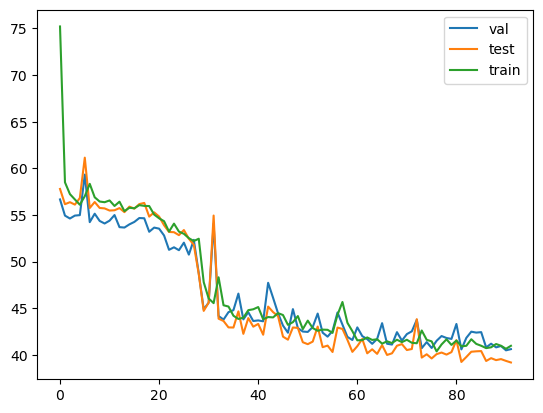

In [41]:
# loss graph

x_list = [i for i in range(0, len(train_loss_hist))]

plt.plot(x_list[0:2000], val_loss_hist[0:2000], label='val')
plt.plot(x_list[0:2000], test_loss_hist[0:2000], label='test')
plt.plot(x_list[0:2000], train_loss_hist[0:2000], label='train')

# plt.plot(x_list, test_loss_hist, label='test') # , color = 'red')

plt.legend()
plt.show()


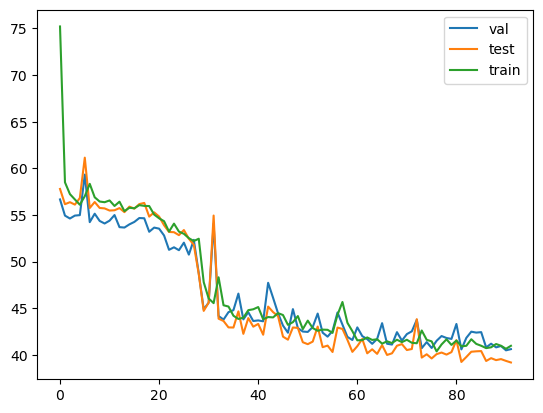

In [42]:
# loss graph

x_list = [i for i in range(0, len(train_loss_hist))]

plt.plot(x_list[0:400], val_loss_hist[0:400], label='val')
plt.plot(x_list[0:400], test_loss_hist[0:400], label='test')
plt.plot(x_list[0:400], train_loss_hist[0:400], label='train')

# plt.plot(x_list, test_loss_hist, label='test') # , color = 'red')

plt.legend()
plt.show()

In [96]:
## load best model
device = torch.device('cuda') #  if torch.cuda.is_available() else 'cpu')

model_path = mod_name
MOD = PointNet().to(device)

MOD.load_state_dict(torch.load(model_path))


<All keys matched successfully>

In [44]:
## PREDICTIONS on a sample ##

@torch.no_grad()
def predict(model, DATA):
    narr = np.zeros(len(np.array(DATA.pos)[0:,0]), dtype = "int")
    narr = torch.from_numpy(narr).to(device)
#     for data in loader:
    model.eval()
    pred = model(DATA.pos.to(device), data.edge_index.to(device), narr)
#         y_output_pred.squeeze(-1)
#         loss = criterion(preds.to(torch.float32).squeeze(-1).to(device), data.y.to(torch.float32).to(device)) # Loss computation.
#         total_MSE += loss.item() #  * data.num_graphs
#         count+=1
        
    return DATA.grow_len2.item(), pred[0].to(torch.float32).squeeze(-1).to(device).item(), DATA.branches2.item(), pred[1].to(torch.float32).squeeze(-1).to(device).item(), DATA.flush2.item(), pred[2].to(torch.float32).squeeze(-1).to(device).item() # len(test_loader.dataset))


# data_example = data_test[15]
# predict(model, data_example)

In [97]:
## PREDICTIONS on a sample ##

@torch.no_grad()
def predict_inverse(model, DATA):
    narr = np.zeros(len(np.array(DATA.pos)[0:,0]), dtype = "int")
    narr = torch.from_numpy(narr).to(device)
#     for data in loader:
    model.eval()
    pred = model(DATA.pos.to(device), data.edge_index.to(device), narr)
        
    return DATA.grow_len.item(), pred[0].to(torch.float32).squeeze(-1).to(device).item(), DATA.branches.item(), pred[1].to(torch.float32).squeeze(-1).to(device).item(), DATA.flush.item(), pred[2].to(torch.float32).squeeze(-1).to(device).item() # len(test_loader.dataset))



In [119]:
## INVERSE SCALE BATCH predict ##
import numpy as np

actual = []
pred = []
actual1 = []
pred1 = []
actual2 = []
pred2 = []
n_points = []

y_diff = []
y_diff1 = []
y_diff2 = []

for data in DBH_DS_test:
#     try:
    model.eval()
    y_true, y_hat, y_true1, y_hat1, y_true2, y_hat2 = predict(MOD, data)
    n_points.append(len(data.pos[0:, 0]))
#     print(data.pos[0:, 0])
    actual.append(y_true)
    pred.append(y_hat)
#     pred.append(scalerGL.inverse_transform(np.array(y_hat).reshape(1, -1)))
    y_diff.append(abs(y_true-y_hat))

    actual1.append(y_true1)
    pred1.append(y_hat1)
    y_diff1.append(abs(y_true1-y_hat1))

    actual2.append(y_true2)
    pred2.append(y_hat2)
    y_diff1.append(abs(y_true2-y_hat2))

#     except:
#         continue

inversed_actualGL = scalerGL.inverse_transform(np.array(actual).reshape(-1, 1))
inversed_predGL = scalerGL.inverse_transform(np.array(pred).reshape(-1, 1))
rms = mean_squared_error(inversed_actualGL, inversed_predGL, squared=False)
MAPE = mean_absolute_percentage_error(inversed_actualGL, inversed_predGL) # 20% (5.3, 0.15 on a good run!)
print("inverse RMS GL", rms, inversed_actualGL.min(), inversed_predGL.max(), MAPE)

""" below code was wrong and needs to be changed!! """
# inversed_actualBR = scalerBR.inverse_transform(np.array(actual).reshape(-1, 1))
# inversed_predBR = scalerBR.inverse_transform(np.array(pred).reshape(-1, 1))
# rms = mean_squared_error(inversed_actualBR, inversed_predBR, squared=False)
# MAPE = mean_absolute_percentage_error(inversed_actualBR, inversed_predBR) # 20% (5.3, 0.15 on a good run!)
# print("inverse RMS BR", rms, inversed_actualBR.min(), inversed_actualBR.max(), MAPE)

# inversed_actualFL = scalerFL.inverse_transform(np.array(actual).reshape(-1, 1))
# inversed_predFL = scalerFL.inverse_transform(np.array(pred).reshape(-1, 1))
# rms = mean_squared_error(inversed_actualFL, inversed_predFL, squared=False)
# MAPE = mean_absolute_percentage_error(inversed_actualFL, inversed_predFL) # 20% (5.3, 0.15 on a good run!)
# print("inverse RMS FL", rms, inversed_actualFL.min(), inversed_actualFL.max(), MAPE)

# rms = mean_squared_error(actual, pred, squared=False)
# MAPE = mean_absolute_percentage_error(actual, pred) # 20% (5.3, 0.15 on a good run!)

# rms2 = mean_squared_error(actual1, pred1, squared=False)
# MAPE2 = mean_absolute_percentage_error(actual1, pred1) # 20% (5.3, 0.15 on a good run!)

# rms3 = mean_squared_error(actual2, pred2, squared=False)
# MAPE3 = mean_absolute_percentage_error(actual2, pred2) # 20% (5.3, 0.15 on a good run!)

# print("GL", rms, "BR", rms2, "FL", rms3)
# Grow, Branches, Flush

inverse RMS GL 0.028360659860795806 0.20000000298023224 0.5660391867379645 0.06353316371051712
inverse RMS GL 0.2658812045189271 3.0 6.0 0.0466095778326897
inverse RMS FL 5.317624090378543 30.0 90.0 0.07268832698370994


In [116]:
inversed_predGL.shape

(117, 1)

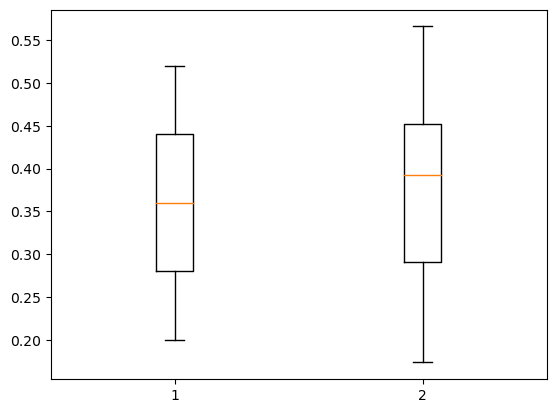

In [117]:
# y_df.describe()
# y_df.boxplot()
plt.boxplot([inversed_actualGL.flatten(), inversed_predGL.flatten()])
plt.show()

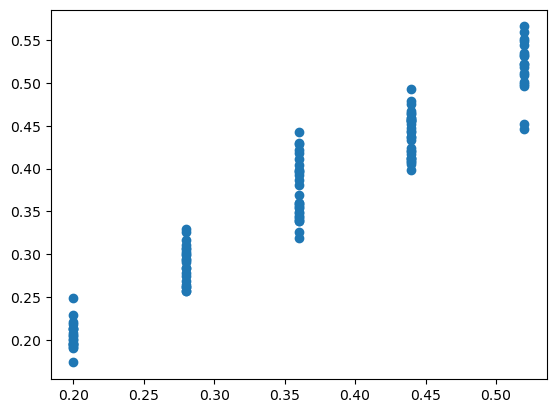

In [118]:
# plt.scatter(inversed_actual, inversed_pred)
plt.scatter(inversed_actualGL.flatten(), inversed_predGL.flatten()) # x, y
plt.show()

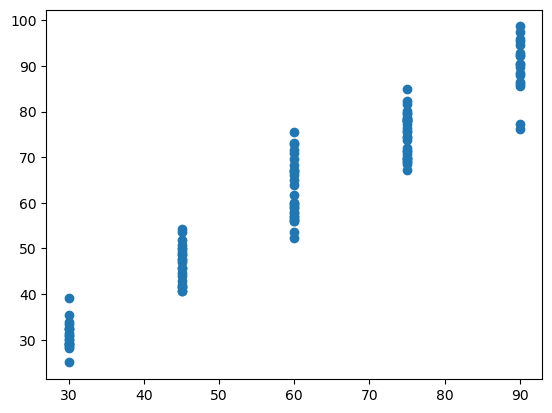

In [120]:
plt.scatter(inversed_actualFL.flatten(), inversed_predFL.flatten()) # x, y
plt.show()

In [1]:
plt.scatter(inversed_actualBR.flatten(), inversed_predBR.flatten()) # x, y
plt.show()

NameError: name 'plt' is not defined

In [51]:
y_true

100.0

In [34]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(actual, pred)
print("R2", r_value)

R2 0.9809153861123402


In [ ]:
weight_t = []
angle_t = []
turn_up_t = []
n_pos_t = []
max_x_t = []
max_y_t = []
max_z_t = []
min_z_t = []
n_pos_orig = []

for i in range(0, len(DBH_DS_test)):
    print(i)
    weight_t.append(DBH_DS_test[i].weight2.item())
    n_pos_orig.append(DBH_DS_test[i].orig_npos)
    angle_t.append(DBH_DS_test[i].angle2.item())
    turn_up_t.append(DBH_DS_test[i].turn_up2.item())
    max_z_t.append(float(max(DBH_DS_test[i].pos[:,2])))
    min_z_t.append(float(min(DBH_DS_test[i].pos[:,2])))
    max_y_t.append(float(max(DBH_DS_test[i].pos[:,1])))
    max_x_t.append(float(max(DBH_DS_test[i].pos[:,0])))
    n_pos_t.append(DBH_DS_test[i].pos.shape[0])

In [ ]:
plt.scatter(pred, n_pos_orig) # x, y
plt.show()

In [ ]:
n_pos_orig

In [ ]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(pred1, n_pos_orig)
print("R2", r_value)

In [ ]:
plt.scatter(actual1, pred1) # x, y
plt.show()

In [ ]:
plt.scatter(actual2, pred2) # x, y
plt.show()

In [ ]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(pred, np.array(n_pos_orig))
print("R2", r_value)

In [ ]:
l = [x * -1 for x in min_z_t]
lists_of_lists = [max_z_t, l]
diff = [sum(x) for x in zip(*lists_of_lists)]

In [5]:
plt.scatter(pred, diff) # x, y
plt.show()

NameError: name 'pred' is not defined

In [ ]:
lists_of_lists = [max_z_t, min_z_t]
diff = [sum(x) for x in zip(*lists_of_lists)]

In [ ]:
plt.scatter(pred, diff) # x, y
plt.show()

In [ ]:
plt.scatter(pred, n_pos_t) # x, y
plt.show()

In [ ]:
plt.scatter(actual, n_pos_t) # x, y
plt.show()